In [1]:
#Imports
pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Loading the dataset
df = pd.read_csv('/kaggle/input/churn-modelling/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
#Checking For Null Values
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
#Checking For Duplicate Values
df.duplicated().sum()

0

In [13]:
# Categorical variables

cat_vars = [col for col in df.columns if df[col].dtype == 'object' and col not in ['CustomerId', 'Surname', 'Exited']]
cat_vars

['Geography', 'Gender']

In [14]:
# Numerical variables

num_vars = [col for col in df.columns if df[col].dtype != 'object' and col not in ['RowNumber', 'CustomerId', 'Exited']]
num_vars 

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

### Univariate Analysis of the Categorical Variables.

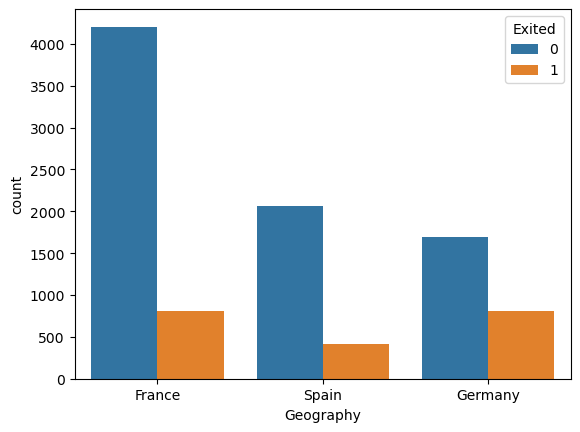

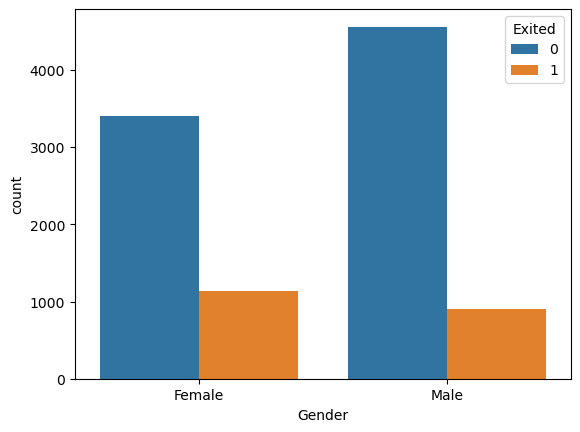

In [8]:
# ploting the categorical variables

for var in cat_vars:
    # Countplot
    sns.countplot(x=var, hue='Exited', data=df)
    plt.show()

### Univariate Analysis of the Numerical Variables

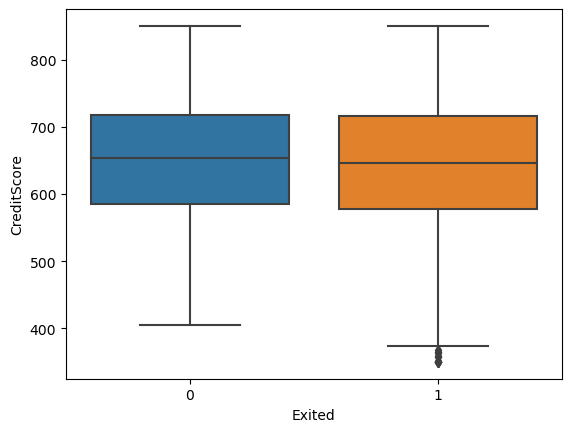

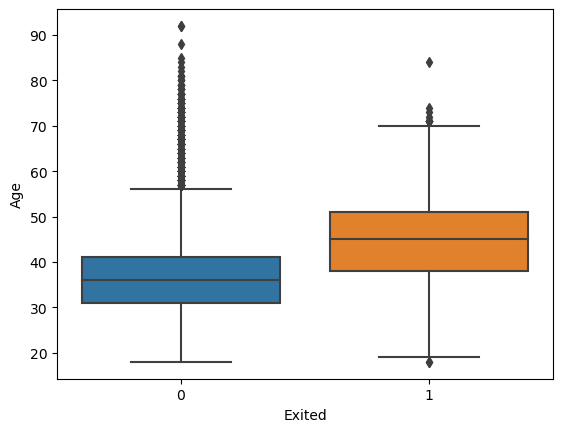

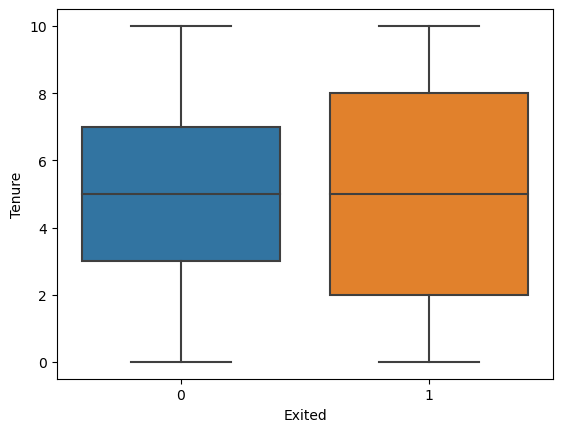

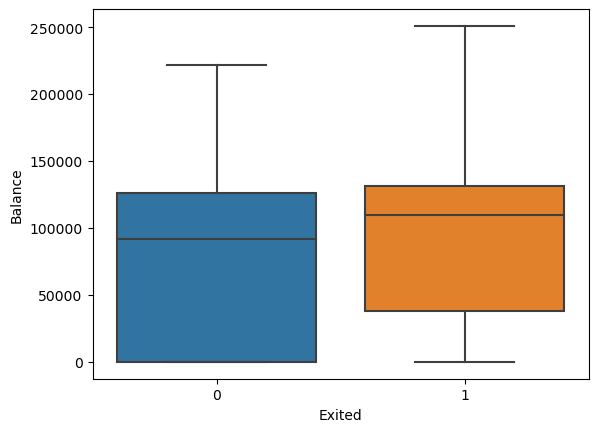

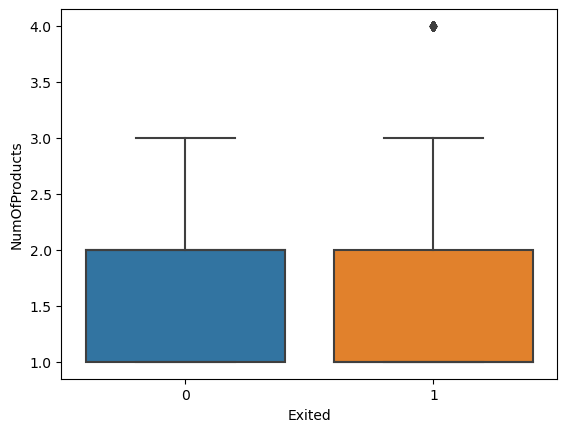

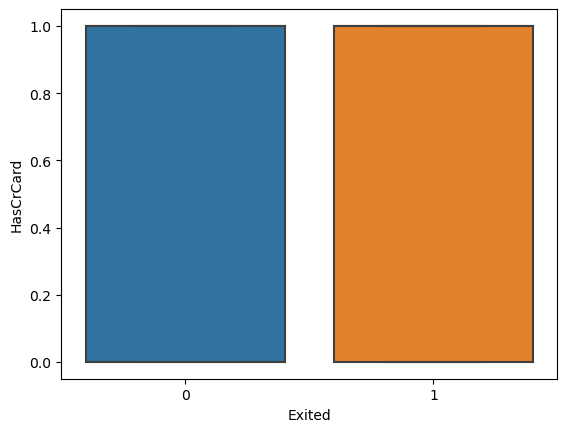

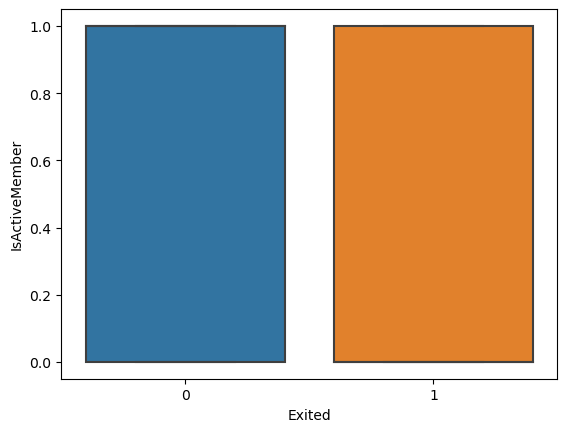

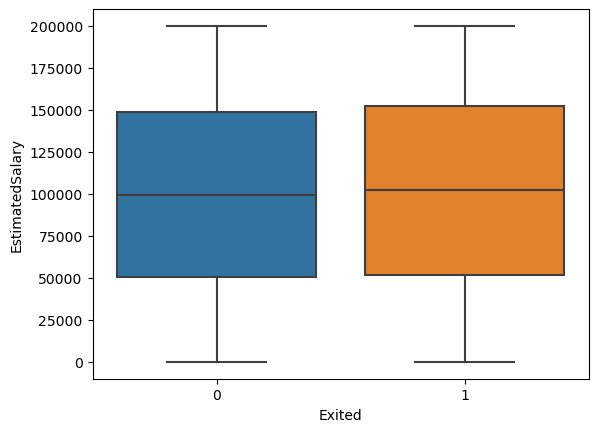

In [9]:
# ploting the categorical variables

for var in num_vars:
    # Boxplot
    sns.boxplot(x='Exited', y=var, data=df)
    plt.show()

### Multivarite Analysis of Categorical Variables with the Target Variable Exited 

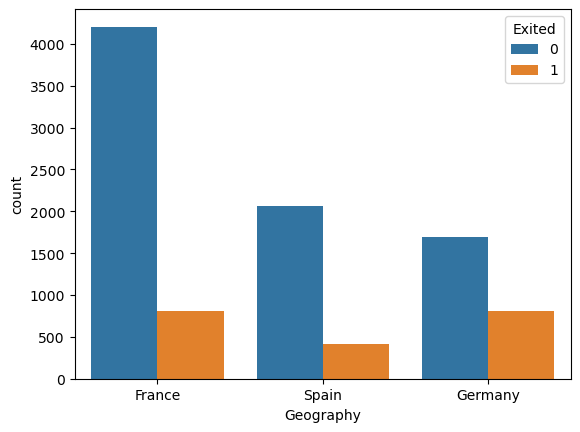

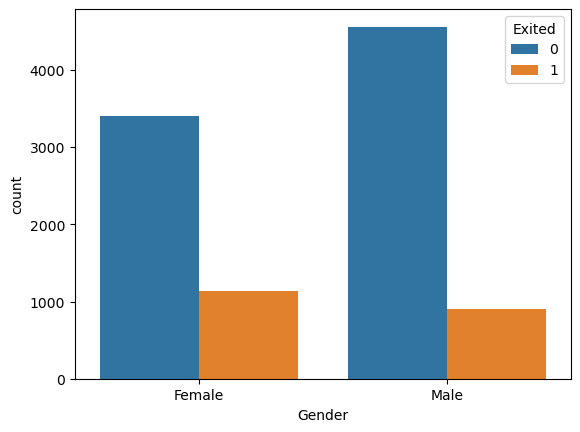

In [10]:
# Loop through categorical variables
for var in cat_vars:
    # Countplot
    sns.countplot(x=var, hue='Exited', data=df)
    plt.show()

### Multivariate analysis of numerical variables with the Target Variables

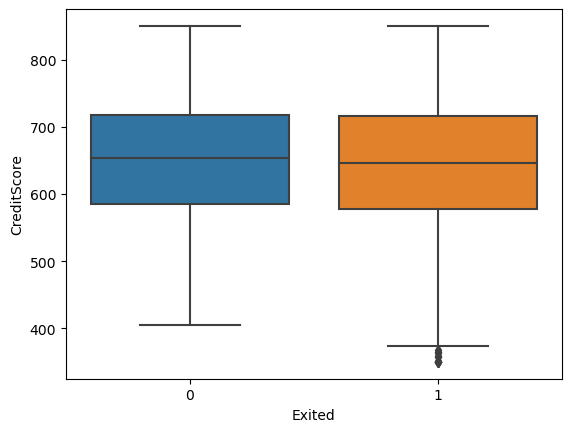

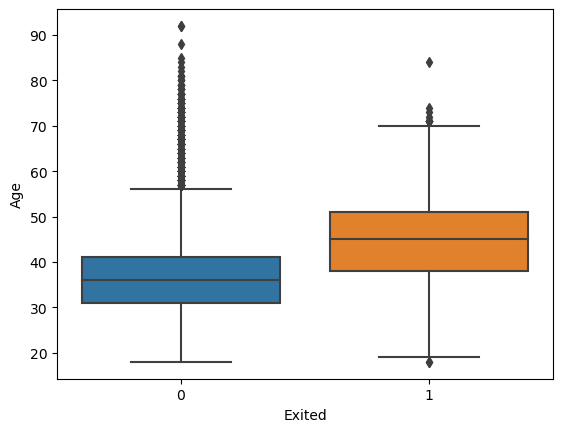

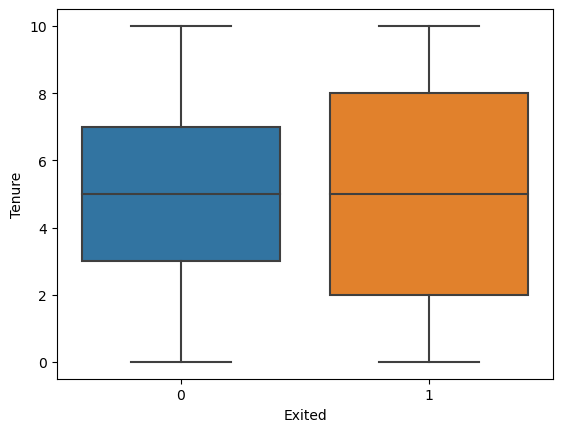

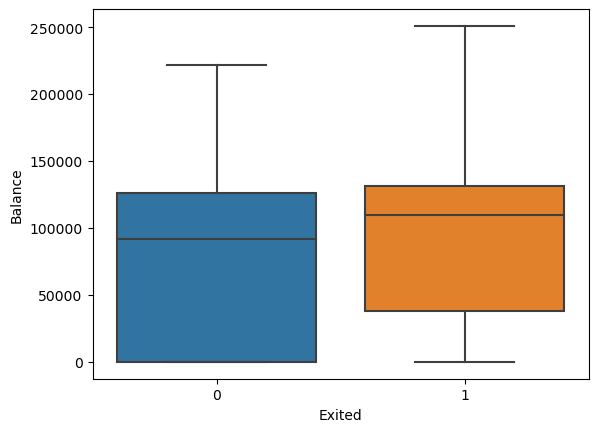

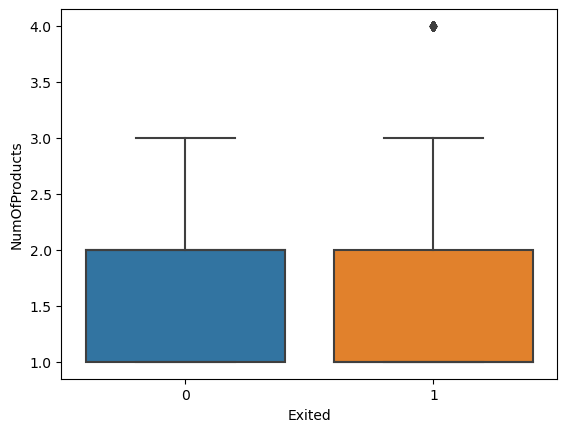

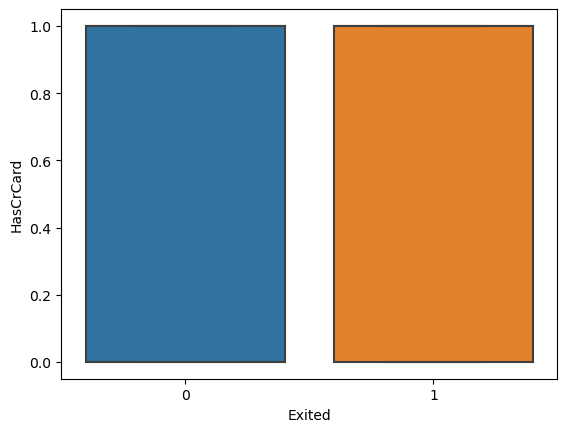

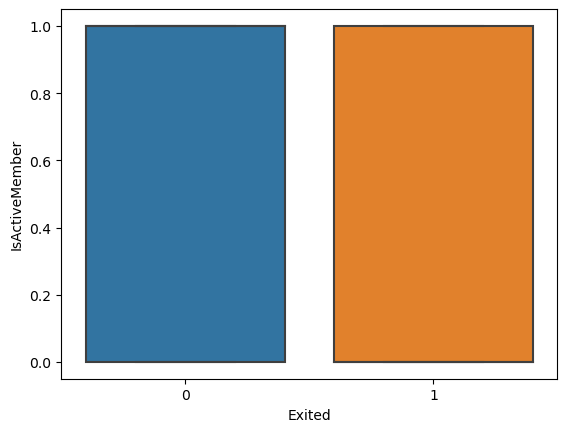

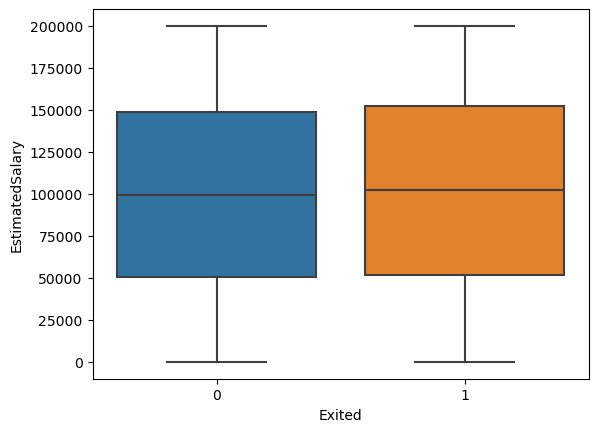

In [11]:
# Loop through numerical variables
for var in num_vars:
    # Boxplot
    sns.boxplot(x='Exited', y=var, data=df)
    plt.show()


 ##  Concluction
Geography and Gender: The countplot shows us that there are more male customers than female customers in the dataset, and the churn rate is slightly higher for female customers. The churn rate is also higher for customers from Germany compared to those from France or Spain.

HasCrCard and IsActiveMember: The countplot shows us that the churn rate is similar for customers with or without a credit card, and also similar for active and inactive members.

CreditScore: The boxplot shows us that the median credit score for customers who churned is slightly lower than that for customers who did not churn, indicating a weak negative relationship between credit score and churn.

Age: The boxplot shows that the median age for customers who churned is slightly higher than that for customers who did not churn, indicating a weak positive relationship between age and churn.

Tenure, Balance, and NumOfProducts: The boxplots show no clear relationship between these variables and churn, as the median values and ranges are similar for customers who churned and those who did not.

EstimatedSalary: The boxplot shows that the median estimated salary for customers who churned is slightly higher than that for customers who did not churn, indicating a weak positive relationship between salary and churn. However, the difference is small and the ranges are similar, so the relationship is not very strong.

<AxesSubplot:>

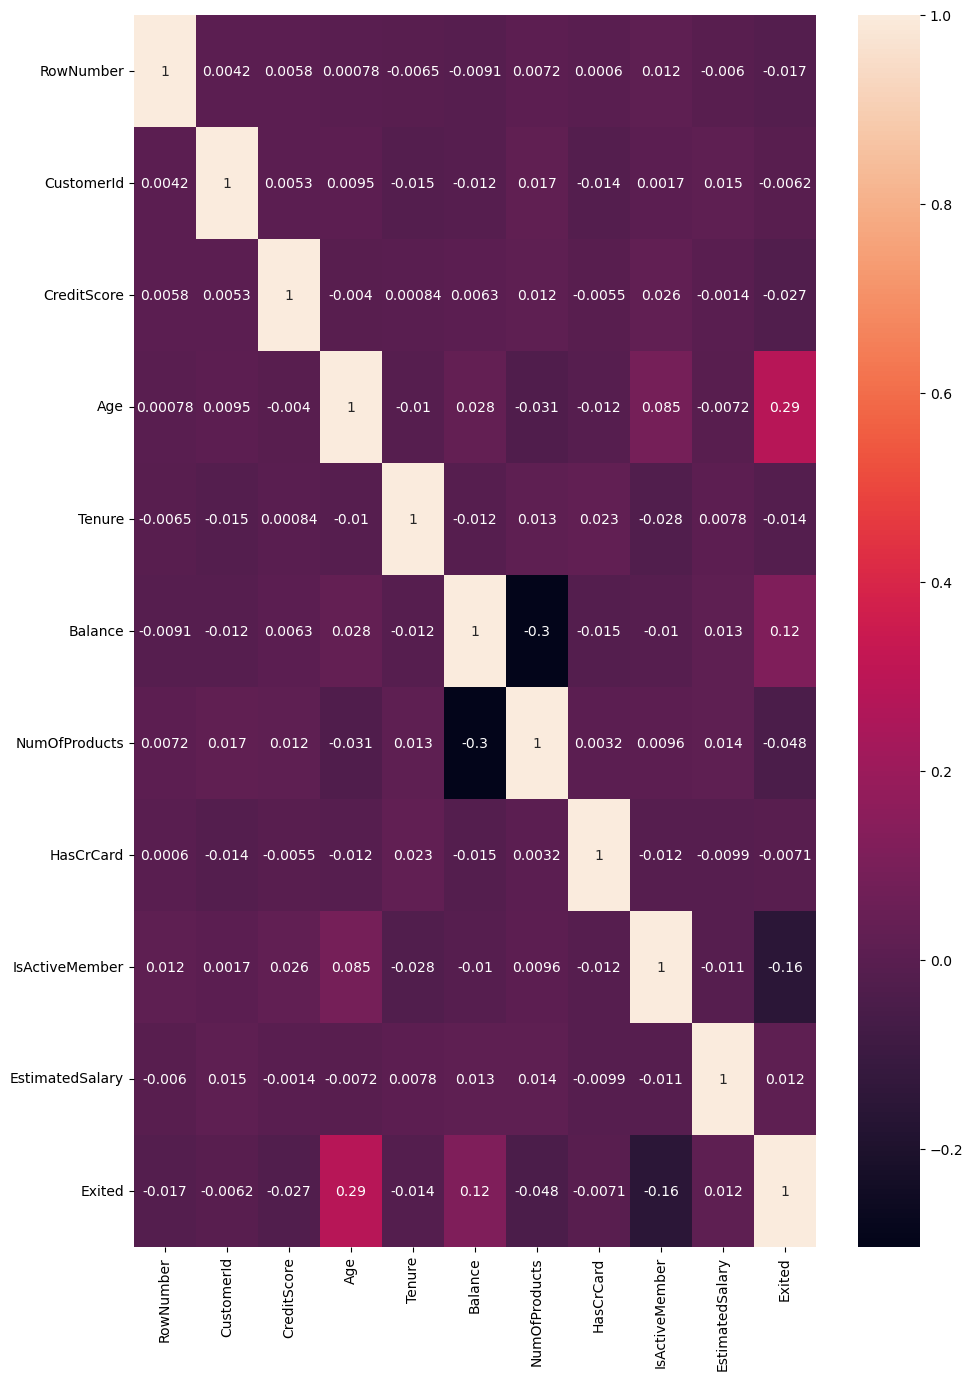

In [12]:
plt.figure(figsize=(11,16))
sns.heatmap(df.corr(),annot=True)

### Concluction
Based on the heatmap, it appears that the variable Age has a weak negative correlation with Exited, while NumOfProducts has a weak positive correlation with Balance. There are no other strong positive or negative correlations between variables in the dataset.

In [15]:
"""This is to get the highly correlated columns so they can be removed later in modeling to avoid overfiting """

from sklearn.feature_selection import VarianceThreshold
#I use the value for the threshold 0.5
thresholder = VarianceThreshold(threshold=0.5)


thresholder.fit(df[num_vars])

selected_cols = df[num_vars].columns[thresholder.get_support()]

print(selected_cols)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'], dtype='object')
